# Introduction

The dataset <BankChurners.csv> is obtained on Kaggle and here is the link
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?select=BankChurners.csv.
This is also my first project after a few months' self learning through DataCamp and via multiple online courses thanks to those who are willing to share the knowledge in data world.

Our goal is to find the best model to predict possible churners in bank.

#### First, 
I will separate columns into both numeric and categorical parts. Among the categorical ones, we could distinguish that they're combined with nominal and ordinal values. I will do EDA and plot to have quick understanding on the data distribution.
#### Second, 
I will go through preprocessing such as transforming nominal data into dummy variables and for ordinal ones I will deal with labelencoding, then scale the data. 
#### Third, 
as our target is a binary classification (Existing V.S. Attrited) I will use four models : Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier and Random Forest Classifier to see the performance.
#### Fourth, 
I will try hyperparameters to see if we could improve model performance.
#### Fifth, 
I will compare the result of unsampling VS sampling using SMOTE method since this is a very imbalanced dataset.

### 1.Data cleaning

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('BankChurners.csv')
df.columns = df.columns.str.replace('_', ' ')
df.head(10)

,CLIENTNUM,Attrition Flag,Customer Age,Gender,Dependent count,Education Level,Marital Status,Income Category,Card Category,Months on book,...,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,NaN
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,NaN
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,NaN
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,NaN
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,NaN


In [26]:
df.isnull().sum()

CLIENTNUM                       0
Attrition Flag                  0
Customer Age                    0
Gender                          0
Dependent count                 0
Education Level                 0
Marital Status                  0
Income Category                 0
Card Category                   0
Months on book                  0
Total Relationship Count        0
Months Inactive 12 mon          0
Contacts Count 12 mon           0
Credit Limit                    0
Total Revolving Bal             0
Avg Open To Buy                 0
Total Amt Chng Q4 Q1            0
Total Trans Amt                 0
Total Trans Ct                  0
Total Ct Chng Q4 Q1             0
Avg Utilization Ratio           0
Unnamed: 21                 10127
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df.drop(['Unnamed: 21', 'CLIENTNUM'], axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition Flag            10127 non-null  object 
 1   Customer Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent count           10127 non-null  int64  
 4   Education Level           10127 non-null  object 
 5   Marital Status            10127 non-null  object 
 6   Income Category           10127 non-null  object 
 7   Card Category             10127 non-null  object 
 8   Months on book            10127 non-null  int64  
 9   Total Relationship Count  10127 non-null  int64  
 10  Months Inactive 12 mon    10127 non-null  int64  
 11  Contacts Count 12 mon     10127 non-null  int64  
 12  Credit Limit              10127 non-null  float64
 13  Total Revolving Bal       10127 non-null  int64  
 14  Avg Op

In [30]:
for c in df.columns:
    print(df[c].value_counts())
    print('*'*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition Flag, dtype: int64
**************************************************
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer Age, dtype: int64
**************************************************
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent count, dtype: int64
**************************************************
Graduate         3128
High School      2013
Unknown          1519
Uneducated       

Even though we don't have null values but in column ' Education_Level', 'Marital_Status' and 'Income_Category' we got unknown values. So I would like to see the percentage of unknown data. We see that the percentage are 14%, 7%, 10% respectively and it's not a small number so maybe it's better idea not to drop them as this might affect the prediction results.

In [33]:
print('The percentage of unknown data in Education Level is :')
print((df['Education Level']=='Unknown').sum()*100/len(df))
print('The percentage of unknown data in Marital Status is :')
print((df['Marital Status']=='Unknown').sum()*100/len(df))
print('The percentage of unknown data in Income Category is :')
print((df['Income Category']=='Unknown').sum()*100/len(df))

The percentage of unknown data in Education Level is :
14.999506270366348
The percentage of unknown data in Marital Status is :
7.3960699121161255
The percentage of unknown data in Income Category is :
10.980547052434087


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition Flag            10127 non-null  object 
 1   Customer Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent count           10127 non-null  int64  
 4   Education Level           10127 non-null  object 
 5   Marital Status            10127 non-null  object 
 6   Income Category           10127 non-null  object 
 7   Card Category             10127 non-null  object 
 8   Months on book            10127 non-null  int64  
 9   Total Relationship Count  10127 non-null  int64  
 10  Months Inactive 12 mon    10127 non-null  int64  
 11  Contacts Count 12 mon     10127 non-null  int64  
 12  Credit Limit              10127 non-null  float64
 13  Total Revolving Bal       10127 non-null  int64  
 14  Avg Op

In [10]:
#Seperate data into categorical and numeric ones by their data types.
num_col = list(df.select_dtypes(include=['int64','float64']).columns)
cat_col = list(df.select_dtypes(include=['object']).columns)

print('categorical columns are: ', cat_col)
print('numeric columns are: ', num_col)

categorical columns are:  ['Attrition Flag', 'Gender', 'Education Level', 'Marital Status', 'Income Category', 'Card Category']
numeric columns are:  ['Customer Age', 'Dependent count', 'Months on book', 'Total Relationship Count', 'Months Inactive 12 mon', 'Contacts Count 12 mon', 'Credit Limit', 'Total Revolving Bal', 'Avg Open To Buy', 'Total Amt Chng Q4 Q1', 'Total Trans Amt', 'Total Trans Ct', 'Total Ct Chng Q4 Q1', 'Avg Utilization Ratio']


### 2. EDA


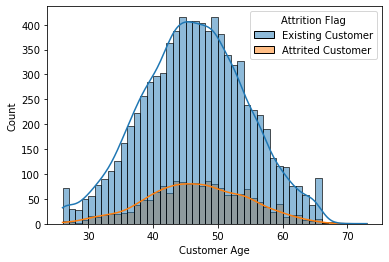

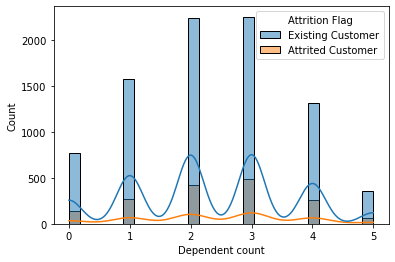

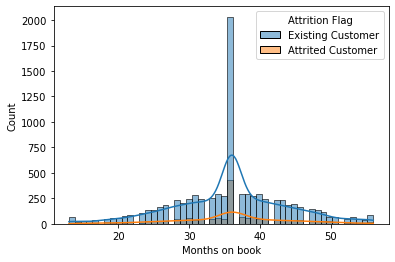

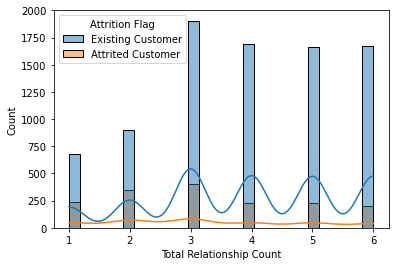

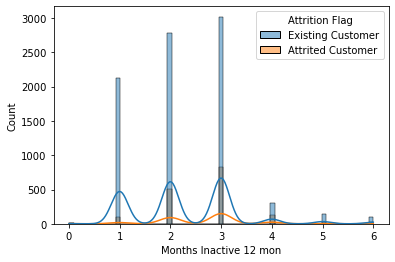

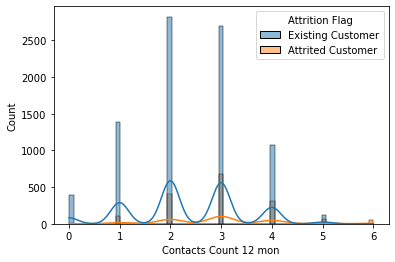

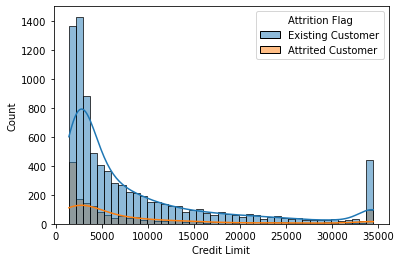

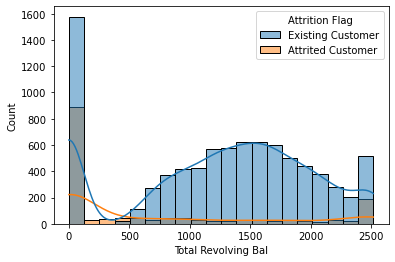

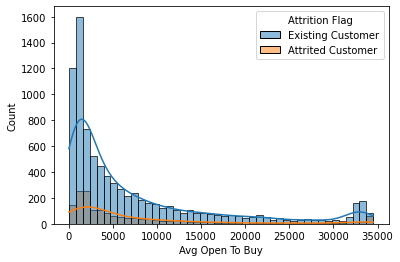

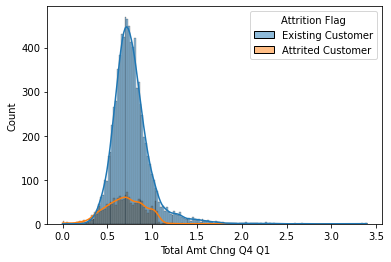

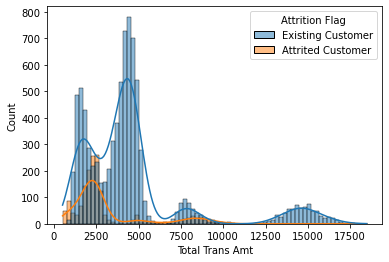

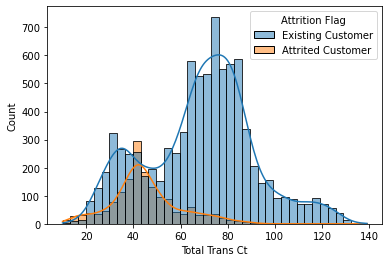

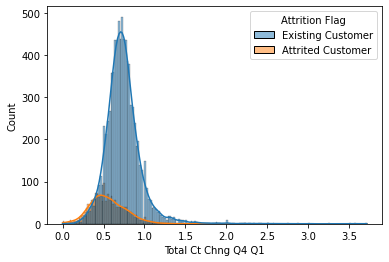

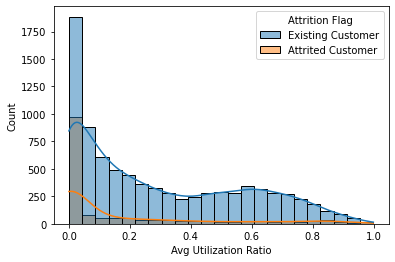

In [11]:
for col in num_col:
    sns.histplot(x=col, data=df, hue='Attrition Flag',kde=True)
    plt.show()

#### Observation:
-  Customer age basically follow normal distribution and most of them are about mid-age (40-50 years old).

-  Among all customers, most of them have been in relationship with bank already for 30-40 months (3 years).

-  If we check customers' activity, most of them could be inactive for up to 3 months no matter still existed or attrited. The number of attrited customers reached the highest at 3 months inactivity. After that, we see there is a dramatic reduce on customer numbers and the gap between existed and attrited becomes more equal. Thus this is a remark for the bank, if a customer has more than 3 months inactivity, he also has higher possibility to be a churner.

-  Total transaction amount and transaction frequency for most attrited customers are 2500 dollars and 40 times.


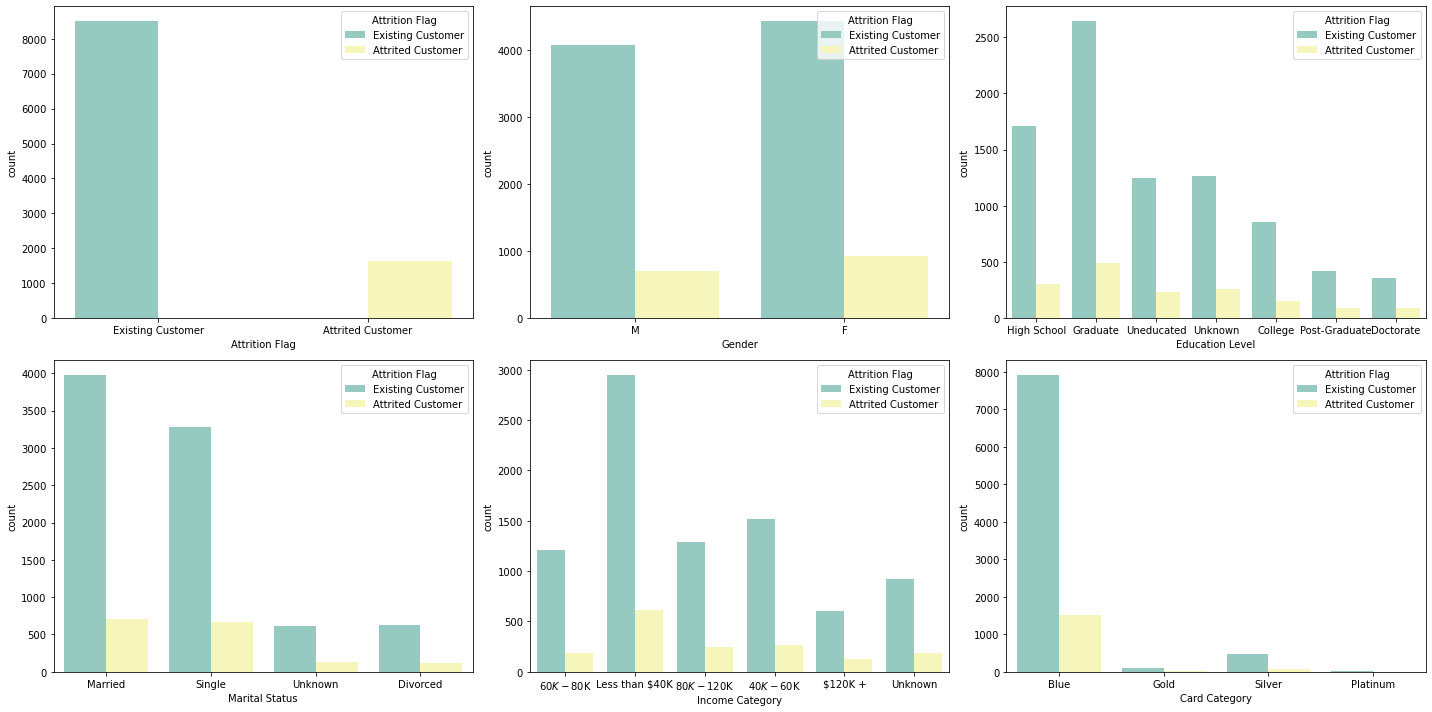

In [12]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, colplot in enumerate(cat_col):   
    ax = axes.flat[i]
    sns.countplot(x=cat_col[i], ax=ax, data=df, hue='Attrition Flag', palette='Set3')
    plt.tight_layout()

### Observation:
- The dataset is very imbalanced. The existing customer data is 4 times more than the churned one. So later on for model prediction we should look for recall (sensitive) rate instead of accuracy.

### 3.Data Preprocessing

Among categorical columns , we got 3 ordinal and 3 nominal variables. 
I will do dummy variables for nominal variables, but for Attrition Flag I will use df.loc to keep Attrited customer as 1.

In [13]:
nominal = ['Attrition Flag', 'Gender', 'Marital Status']

ordinal = ['Education Level', 'Income Category', 'Card Category']

In [14]:
df = pd.get_dummies(data=df, columns=['Gender', 'Marital Status'], drop_first=True)   
df.loc[df['Attrition Flag']=='Existing Customer', 'Attrition Flag'] = 0
df.loc[df['Attrition Flag']=='Attrited Customer', 'Attrition Flag'] = 1

In [15]:
# I will use map funtinon instead of labelencoding for ordinal variables

en_education = {
'Unknown':0,
'Uneducated':1,
'High School':2,
'College':3,
'Graduate':4,
'Post-Graduate':5,
'Doctorate':6
}

en_income = {
'Unknown':0,
'Less than $40K':1,
'$40K - $60K':2,
'$60K - $80K':3,
'$80K - $120K':4,
'$120K +':5            
}

en_card = {
'Blue':0,
'Silver':1,
'Gold':2,
'Platinum':3   
}


df['Education Level'] = df['Education Level'].map(en_education)
df['Income Category'] = df['Income Category'].map(en_income)
df['Card Category'] = df['Card Category'].map(en_card)

df.drop(df.iloc[:,2:5], axis=1)
df

,Attrition Flag,Customer Age,Dependent count,Education Level,Income Category,Card Category,Months on book,Total Relationship Count,Months Inactive 12 mon,Contacts Count 12 mon,...,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio,Gender_M,Marital Status_Married,Marital Status_Single,Marital Status_Unknown
0,0,45,3,2,3,0,39,5,1,3,...,11914.0,1.335,1144,42,1.625,0.061,1,1,0,0
1,0,49,5,4,1,0,44,6,1,2,...,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0
2,0,51,3,4,4,0,36,4,1,0,...,3418.0,2.594,1887,20,2.333,0.000,1,1,0,0
3,0,40,4,2,1,0,34,3,4,1,...,796.0,1.405,1171,20,2.333,0.760,0,0,0,1
4,0,40,3,1,3,0,21,5,1,0,...,4716.0,2.175,816,28,2.500,0.000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,4,2,0,40,3,2,3,...,2152.0,0.703,15476,117,0.857,0.462,1,0,1,0
10123,1,41,2,0,2,0,25,4,2,3,...,2091.0,0.804,8764,69,0.683,0.511,1,0,0,0
10124,1,44,1,2,1,0,36,5,3,4,...,5409.0,0.819,10291,60,0.818,0.000,0,1,0,0
10125,1,30,2,4,2,0,36,4,3,3,...,5281.0,0.535,8395,62,0.722,0.000,1,0,0,1


In [16]:
df.columns

Index(['Attrition Flag', 'Customer Age', 'Dependent count', 'Education Level',
       'Income Category', 'Card Category', 'Months on book',
       'Total Relationship Count', 'Months Inactive 12 mon',
       'Contacts Count 12 mon', 'Credit Limit', 'Total Revolving Bal',
       'Avg Open To Buy', 'Total Amt Chng Q4 Q1', 'Total Trans Amt',
       'Total Trans Ct', 'Total Ct Chng Q4 Q1', 'Avg Utilization Ratio',
       'Gender_M', 'Marital Status_Married', 'Marital Status_Single',
       'Marital Status_Unknown'],
      dtype='object')

If we drop all outliers, only 6463 data will be left and it's almost the half of the original dataset.
so in the end I will keep these outliers

In [17]:
# check outliers
num_col

for i in num_col:
    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    median = np.quantile(df[i], 0.5)
    iqr = q3-q1
    upper_bound = q3+1.5*iqr
    lower_bound = q1-1.5*iqr
    print(f'The median of {i} is: {median}')
    print(f'The Q1 of {i} is: {q1}')
    print(f'The Q3 of {i} is: {q3}')
    print(f'The upper bound of {i} is: {upper_bound}')
    print(f'The lower bound of {i} is: {lower_bound}')
    print('*'*50)
    
#    df = df.drop(df[(df[i] > upper_bound) | (df[i] < lower_bound)].index)
#len(df)

The median of Customer Age is: 46.0
The Q1 of Customer Age is: 41.0
The Q3 of Customer Age is: 52.0
The upper bound of Customer Age is: 68.5
The lower bound of Customer Age is: 24.5
**************************************************
The median of Dependent count is: 2.0
The Q1 of Dependent count is: 1.0
The Q3 of Dependent count is: 3.0
The upper bound of Dependent count is: 6.0
The lower bound of Dependent count is: -2.0
**************************************************
The median of Months on book is: 36.0
The Q1 of Months on book is: 31.0
The Q3 of Months on book is: 40.0
The upper bound of Months on book is: 53.5
The lower bound of Months on book is: 17.5
**************************************************
The median of Total Relationship Count is: 4.0
The Q1 of Total Relationship Count is: 3.0
The Q3 of Total Relationship Count is: 5.0
The upper bound of Total Relationship Count is: 8.0
The lower bound of Total Relationship Count is: 0.0
*******************************************

In [18]:
df.describe(include='all')

,Attrition Flag,Customer Age,Dependent count,Education Level,Income Category,Card Category,Months on book,Total Relationship Count,Months Inactive 12 mon,Contacts Count 12 mon,...,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio,Gender_M,Marital Status_Married,Marital Status_Single,Marital Status_Unknown
count,10127.0,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,2.346203,2.601955,2.085711,0.083638,35.928409,3.812580,2.341167,2.455317,...,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.470919,0.462822,0.389355,0.073961
std,NaN,8.016814,1.298908,1.700417,1.474639,0.333784,7.986416,1.554408,1.010622,1.106225,...,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.499178,0.498641,0.487628,0.261720
min,NaN,26.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,...,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,41.000000,1.000000,1.000000,1.000000,0.000000,31.000000,3.000000,2.000000,2.000000,...,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000,0.000000,0.000000,0.000000
50%,NaN,46.000000,2.000000,3.000000,2.000000,0.000000,36.000000,4.000000,2.000000,2.000000,...,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000,0.000000,0.000000,0.000000
75%,NaN,52.000000,3.000000,4.000000,3.000000,0.000000,40.000000,5.000000,3.000000,3.000000,...,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000,1.000000,1.000000,0.000000


In [19]:
df['Attrition Flag'].value_counts()

# The number of  Existing customer is 8500 while attrited ones are only 1627.

0    8500
1    1627
Name: Attrition Flag, dtype: int64

After spliting data into X_train, X_test, y_train, y_test, as we could see from the plots and the outliers before, I will standardize on numeric features in order to reduce the standard deviation of features while maintaing mean values at 0 ,then concat with categorical features.

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
X=df.drop('Attrition Flag',axis=1)
y=df['Attrition Flag'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col])
# during scaler it's turned into np.array so I have to change to dataframe in order to concatenate with cat_col
cat_col1 = ['Education Level','Income Category', 'Card Category', 'Gender_M', 'Marital Status_Married',
            'Marital Status_Single', 'Marital Status_Unknown']
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col) 
X_train_scaled = pd.concat([X_train_scaled.reset_index(drop=True), X_train[cat_col1].reset_index(drop=True)], axis=1)

# same for X_test
X_test_scaled = scaler.transform(X_test[num_col])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col)
X_test_scaled = pd.concat([X_test_scaled.reset_index(drop=True), X_test[cat_col1].reset_index(drop=True)], axis=1)

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(8101, 21)
(2026, 21)
(8101,)
(2026,)


### 4. Model building
Here I will go for classification models and compare their results.

- Logistic Regression

- K-Neighbors Classifier

- Decision Tree Classifier

- Random Forest Classifier

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

models={
'lr' : LogisticRegression(random_state = 1),
'knn' : KNeighborsClassifier(),
'dt' : DecisionTreeClassifier(random_state = 1),
'rf' : RandomForestClassifier(random_state = 1)
}

[[1638   57]
 [ 142  189]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1695
           1       0.77      0.57      0.66       331

    accuracy                           0.90      2026
   macro avg       0.84      0.77      0.80      2026
weighted avg       0.90      0.90      0.90      2026

The recall rate for lr is 0.5709969788519638
********************************************************************************


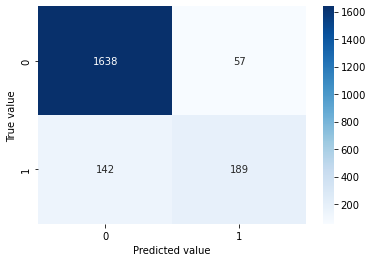

[[1641   54]
 [ 139  192]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1695
           1       0.78      0.58      0.67       331

    accuracy                           0.90      2026
   macro avg       0.85      0.77      0.80      2026
weighted avg       0.90      0.90      0.90      2026

The recall rate for knn is 0.5800604229607251
********************************************************************************


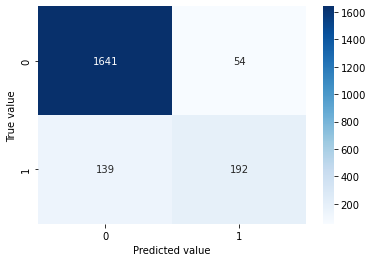

[[1630   65]
 [  63  268]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1695
           1       0.80      0.81      0.81       331

    accuracy                           0.94      2026
   macro avg       0.88      0.89      0.88      2026
weighted avg       0.94      0.94      0.94      2026

The recall rate for dt is 0.8096676737160121
********************************************************************************


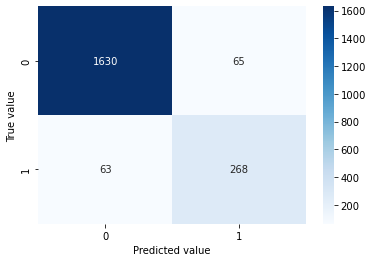

[[1674   21]
 [  57  274]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1695
           1       0.93      0.83      0.88       331

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

The recall rate for rf is 0.8277945619335347
********************************************************************************


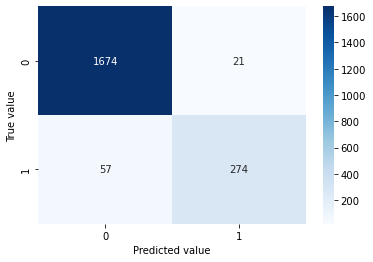

In [22]:
#models = [lr,knn,dt,rf]
def result(models):
    for key, value in models.items():
        i=0
        predictions =[]
        recall_rate =[]
        value.fit(X_train_scaled, y_train)
        prediction = value.predict(X_test_scaled)
        predictions.append(prediction)
        rs = recall_score(y_test, predictions[i])
        recall_rate.append(rs)
        cm = confusion_matrix(y_test, predictions[i])
        print(cm)
        print(classification_report(y_test, predictions[i]))
        print('The recall rate for {} is {}'.format(key, recall_rate[i]))
        print('*'*80)
        i+=1
        sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted value')
        plt.ylabel('True value')
        plt.show()
result(models)

### 4. hyperparameter Tunning 
Random forest model reach the highest recall score at 83% hence it's among the 4 models prefered one.
Now let's see how we could improve Random forest model to get better result.

In [23]:
from sklearn.model_selection import GridSearchCV
#Random forest classifier parameters
params = {'n_estimators': [50,100,200,300,400],
          'criterion':['gini', 'entropy', 'log_loss'],
          'max_features':['sqrt', 'log2', 'None']
                   }


# GridSearchCV parameters
gs = GridSearchCV(estimator=list(models.values())[3],
                  param_grid=params
                 )

gs.fit(X_train_scaled,y_train)

gs_best_params = gs.best_params_
print(gs_best_params)
print(gs.best_score_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}
0.9581549264666682


In [24]:
tune = RandomForestClassifier(random_state = 1, **gs_best_params)
tune.fit(X_train_scaled, y_train)
tuned_prediction = tune.predict(X_test_scaled)
tuned_report = classification_report(y_test, tuned_prediction)
print(tuned_report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1695
           1       0.93      0.84      0.88       331

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



- Seems like we don't improve much with hyperparameters, we increase recall rate from 83 to 84%

### 5. Resampling with SMOTE on imbalanced dataset

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_scaled_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

The number of Attrited flag before SMOTE
0    6805
1    1296
Name: Attrition Flag, dtype: int64


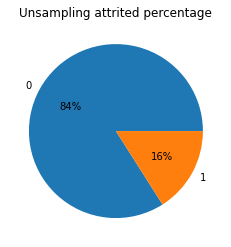

In [26]:
unsampling = y_train.value_counts()
plt.pie(unsampling, labels=unsampling.index, autopct='%.0f%%')
plt.title('Unsampling attrited percentage')
print('The number of Attrited flag before SMOTE')
print(unsampling)

The number of Attrited flag after SMOTE
0    6805
1    6805
Name: Attrition Flag, dtype: int64


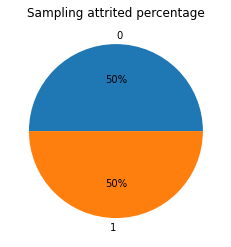

In [27]:
sampling = y_train_sm.value_counts()
plt.pie(sampling, labels=sampling.index, autopct='%.0f%%')
plt.title('Sampling attrited percentage')
print('The number of Attrited flag after SMOTE')
print(sampling)

[[1487  208]
 [  58  273]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1695
           1       0.57      0.82      0.67       331

    accuracy                           0.87      2026
   macro avg       0.77      0.85      0.80      2026
weighted avg       0.90      0.87      0.88      2026

The recall rate for lr is 0.824773413897281
********************************************************************************


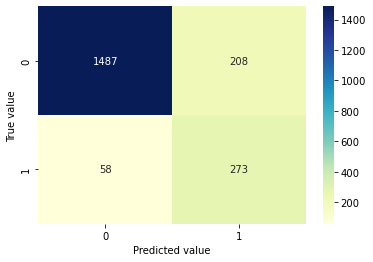

[[1474  221]
 [  42  289]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1695
           1       0.57      0.87      0.69       331

    accuracy                           0.87      2026
   macro avg       0.77      0.87      0.80      2026
weighted avg       0.91      0.87      0.88      2026

The recall rate for knn is 0.8731117824773413
********************************************************************************


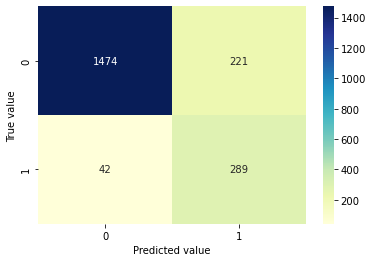

[[1581  114]
 [  60  271]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1695
           1       0.70      0.82      0.76       331

    accuracy                           0.91      2026
   macro avg       0.83      0.88      0.85      2026
weighted avg       0.92      0.91      0.92      2026

The recall rate for dt is 0.8187311178247734
********************************************************************************


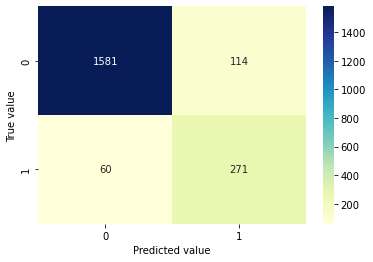

[[1657   38]
 [  37  294]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1695
           1       0.89      0.89      0.89       331

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

The recall rate for rf is 0.8882175226586103
********************************************************************************


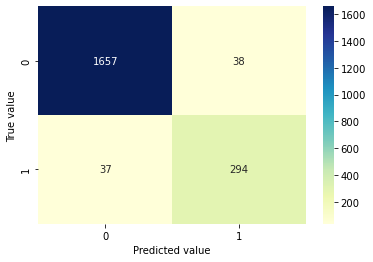

In [28]:
def result_smote(models):
    for key, value in models.items():
        i=0
        predictions =[]
        recall_rate =[]
        value.fit(X_train_scaled_sm, y_train_sm)
        prediction = value.predict(X_test_scaled)
        predictions.append(prediction)
        rs = recall_score(y_test, predictions[i])
        recall_rate.append(rs)
        cm = confusion_matrix(y_test, predictions[i])
        print(cm)
        print(classification_report(y_test, predictions[i]))
        print('The recall rate for {} is {}'.format(key, recall_rate[i]))
        print('*'*80)
        i+=1
        sns.heatmap(cm, annot = True, fmt='d', cmap='YlGnBu')
        plt.xlabel('Predicted value')
        plt.ylabel('True value')
        plt.show()
result_smote(models)

### Conclusion
- Comprared with 83 % recall rate before, we got 89% recall rate (TP/TP+FN) after SMOTE, despite that the precision rate(TP/TP+FP) seems to be decreased. Yet, our target is to identify the possible churners(minority class), so at the cost of lower precision, it's still more ideal number to look for according to our business case.